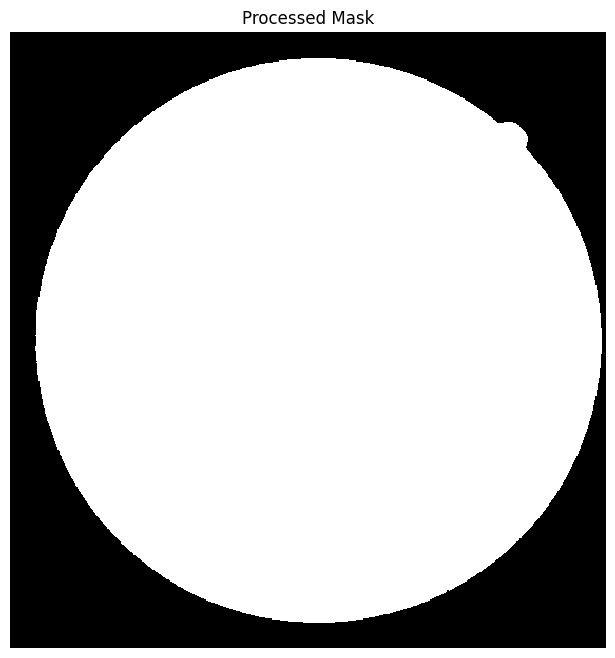

Mask shape: (584, 565)
Unique mask values: [0 1]


In [9]:
import numpy as np
import torch
from PIL import Image
from pathlib import Path
from os.path import splitext
import matplotlib.pyplot as plt

def load_image(filename):
    ext = splitext(filename)[1]
    if ext == '.npy':
        return Image.fromarray(np.load(filename))
    elif ext in ['.pt', '.pth']:
        return Image.fromarray(torch.load(filename).numpy())
    else:
        return Image.open(filename)

def preprocess(mask_values, pil_img, scale, is_mask):
    w, h = pil_img.size
    newW, newH = int(scale * w), int(scale * h)
    assert newW > 0 and newH > 0, 'Scale is too small, resized images would have no pixel'
    pil_img = pil_img.resize((newW, newH), resample=Image.NEAREST if is_mask else Image.BICUBIC)
    img = np.asarray(pil_img)

    if is_mask:
        mask = np.zeros((newH, newW), dtype=np.int64)
        for i, v in enumerate(mask_values):
            if img.ndim == 2:
                mask[img == v] = i
            else:
                mask[(img == v).all(-1)] = i

        return mask

    else:
        if img.ndim == 2:
            img = img[np.newaxis, ...]
        else:
            img = img.transpose((2, 0, 1))

        if (img > 1).any():
            img = img / 255.0

        return img

def test_functions(mask_file_path, scale=1.0):
    mask_img = load_image(mask_file_path)
    mask_array = np.asarray(mask_img)
    unique_values = np.unique(mask_array)
    mask_values = list(sorted(unique_values))  
    mask = preprocess(mask_values, mask_img, scale, is_mask=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(mask, cmap='gray', interpolation='nearest')
    plt.title('Processed Mask')
    plt.axis('off')  
    plt.show()

    print("Mask shape:", mask.shape)
    print("Unique mask values:", np.unique(mask))

if __name__ == "__main__":
    mask_file = r'C:\Users\linizhang\Desktop\tuxiang\03_test_mask.gif'
    test_functions(mask_file)